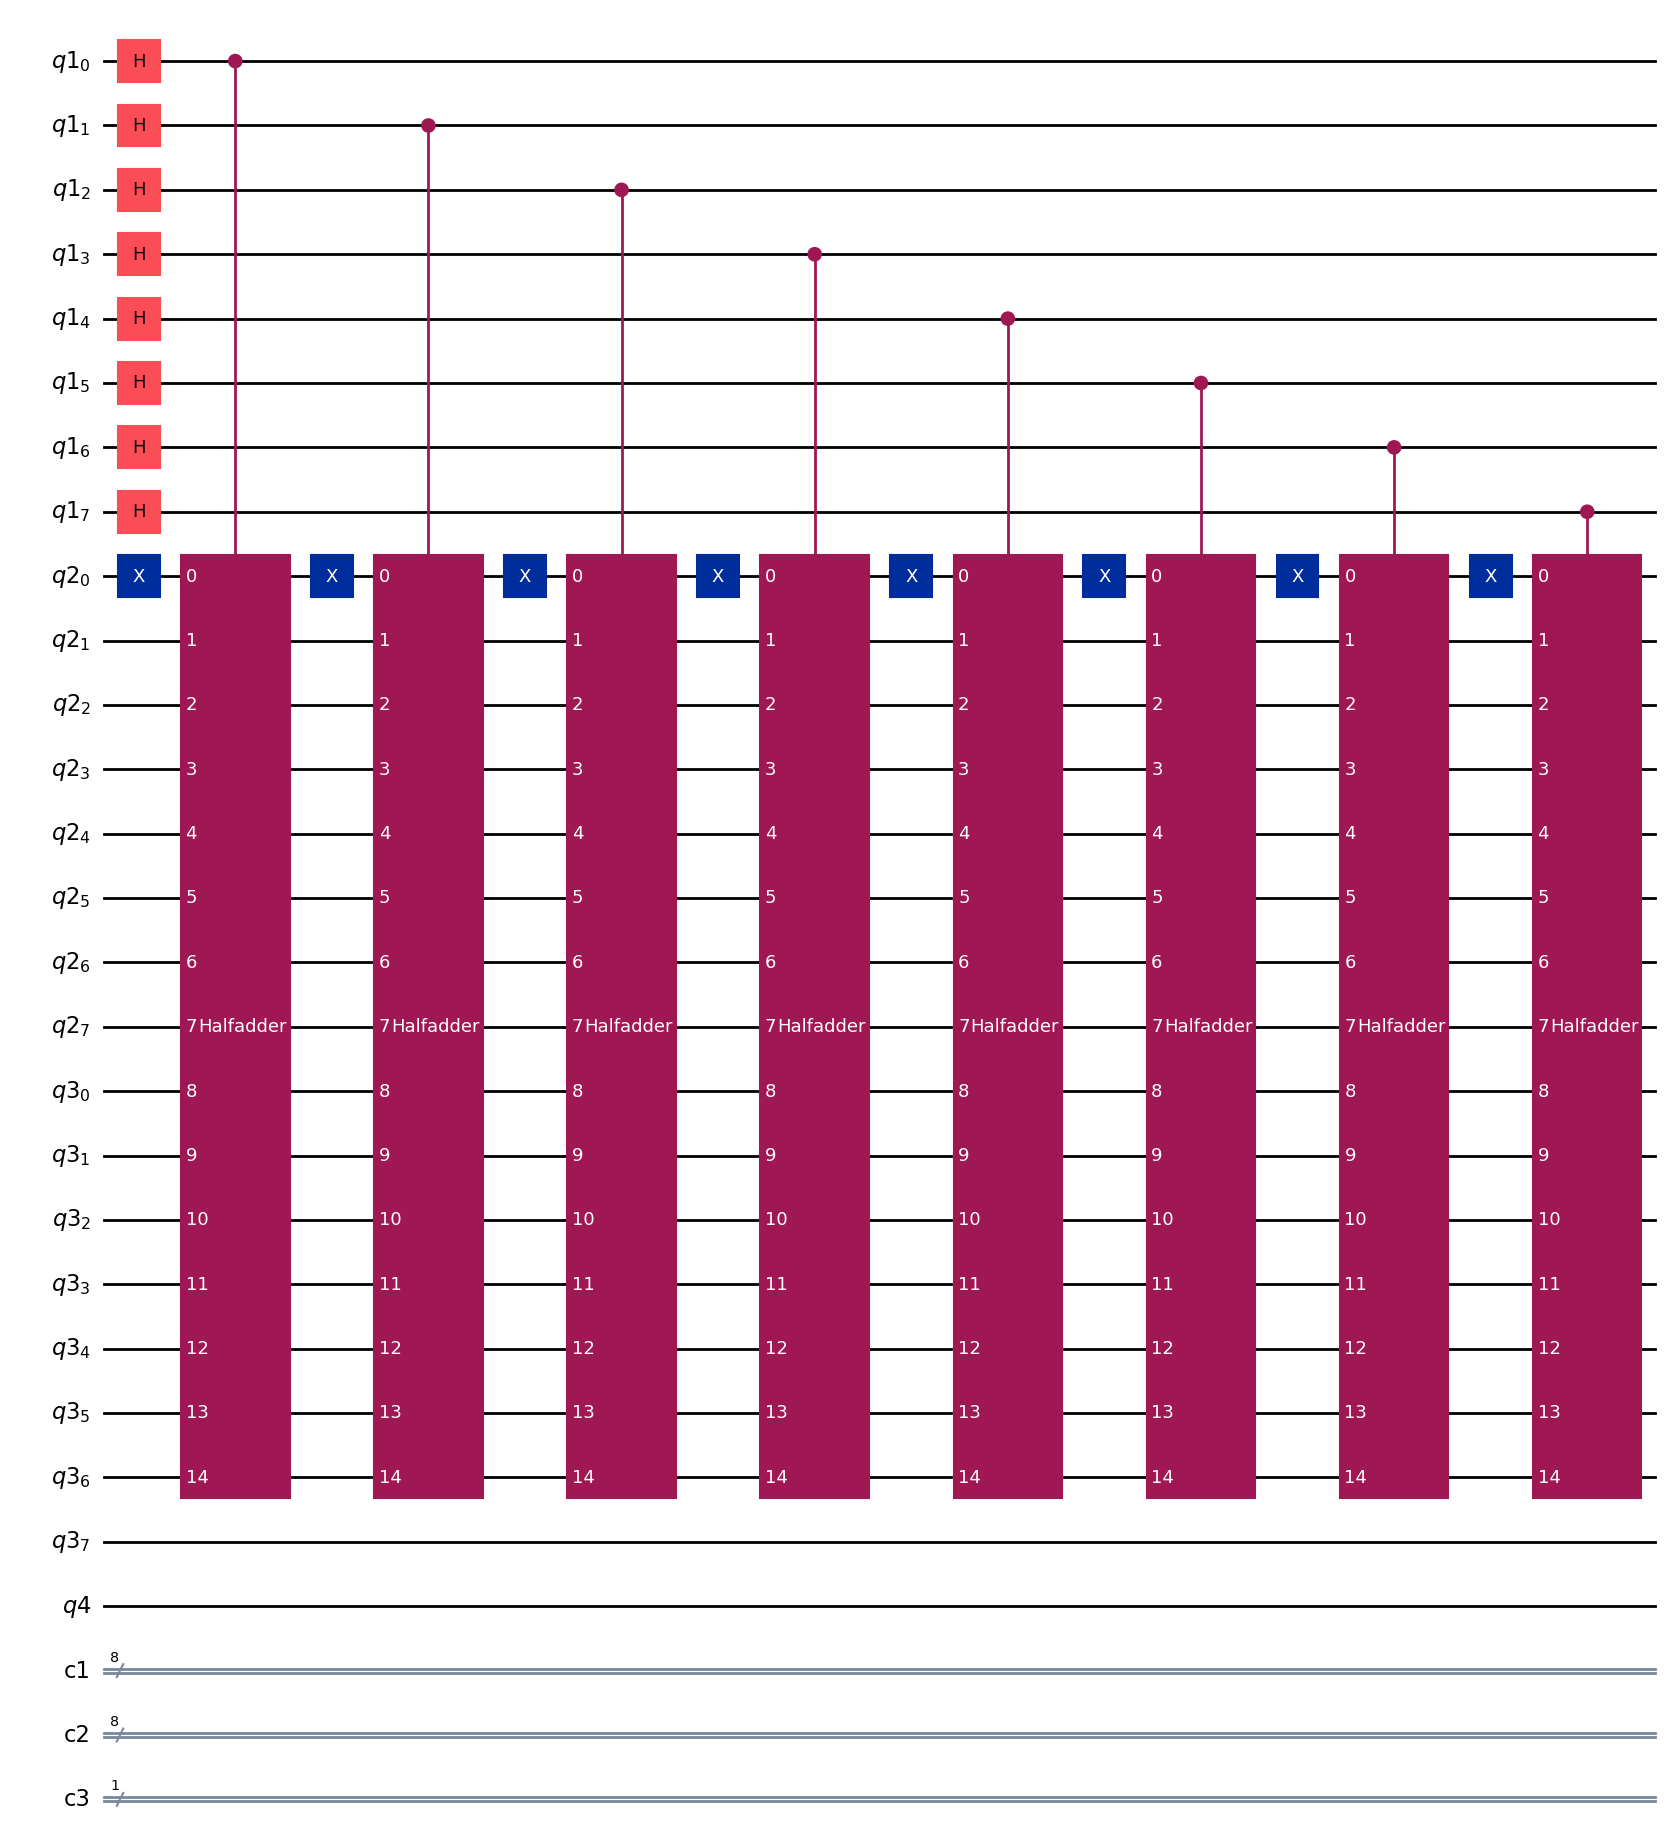

In [1]:
N_COUNT = 8
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import HalfAdderGate
from qiskit_aer import AerSimulator
qr1 = QuantumRegister(N_COUNT, 'q1')
qr2 = QuantumRegister(N_COUNT, 'q2')
qr3 = QuantumRegister(N_COUNT, 'q3')
cl1 = ClassicalRegister(N_COUNT, 'c1')
cl2 = ClassicalRegister(N_COUNT, 'c2')
qr4 = QuantumRegister(1, 'q4')
cl3 = ClassicalRegister(1, 'c3')

qc = QuantumCircuit(qr1, qr2, qr3, qr4, cl1, cl2, cl3)
adder = HalfAdderGate(num_state_qubits=N_COUNT-1).control(1)
for q in range(N_COUNT):
    qc.h(qr1[q])
for q in range(N_COUNT):
    qc.x(qr2[0])
    qc.append(adder, [q]+list(range(8,23)))
qc.draw('mpl')

In [2]:
simulator = AerSimulator()
qcircuit = transpile(qc, simulator)
# counts = result.get_counts(qcircuit)
# plot_histogram(counts, title='Bell-State counts')

In [3]:
result = simulator.run(qcircuit).result()

In [4]:
print(result)
print('untranspiled qc results')
print('gates used: ', dict(qc.count_ops()))
print('total # of gates used: ', sum(dict(qc.count_ops()).values()))
print('number of qubits: ', qc.num_qubits)
print ('transpiled qcircuit results')
print('gates used: ', dict(qcircuit.count_ops()))
print('total # of gates used: ', sum(dict(qcircuit.count_ops()).values()))
print('number of qubits: ', qcircuit.num_qubits)

Result(backend_name='aer_simulator', backend_version='0.16.4', qobj_id='', job_id='47030ac2-de9f-4ee1-9cbe-7503f82f0075', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(creg_sizes=[['c1', 8], ['c2', 8], ['c3', 1]], global_phase=0.0, memory_slots=17, n_qubits=25, name='circuit-162', qreg_sizes=[['q1', 8], ['q2', 8], ['q3', 8], ['q4', 1]], metadata={}), status=DONE, seed_simulator=3381879164, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 10, 'parallel_shots': 1, 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [], 'device': 'CPU', 'time_taken': 0.000257333, 'measure_sampling': False, 'num_clbits': 17, 'max_memory_mb': 65536, 'input_qubit_map': [], 'num_qubits': 0, 'method': 'stabilizer', 'required_memory_mb': 0}, time_taken=0.000257333)], date=2025-03-24T21:55:31.318122, status=COMPLETED, header=None, metadata={'time_ta